# Análise da base Virufy COVID-19

Neste notebook, apresentamos uma análise exploratória da base de dados Virufy COVID-19.

In [1]:
import pandas as pd

url = 'https://github.com/virufy/virufy-data/raw/main/clinical/labels.csv'
dados = pd.read_csv(url)
dados

,date,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms,cough_filename
0,4/21,negative,53,male,"none,",yes,"none,",neg-0421-083-cough-m-53.mp3
1,4/21,positive,50,male,"Congestive heart failure,",no,"Shortness of breath,",pos-0421-084-cough-m-50.mp3
2,4/21,negative,43,male,"none,",no,"Sore throat,",neg-0421-085-cough-m-43.mp3
3,4/21,positive,65,male,"Asthma or chronic lung disease,",no,"Shortness of breath,New or worsening cough,",pos-0421-086-cough-m-65.mp3
4,4/21,positive,40,female,"none,",no,"Sore throat,Loss of taste,Loss of smell,",pos-0421-087-cough-f-40.mp3
5,4/21,negative,66,female,"Diabetes with complications,",no,"none,",neg-0421-088-cough-f-66.mp3
6,4/21,negative,20,female,"none,",no,"none,",neg-0421-089-cough-f-20.mp3
7,4/21,negative,17,female,"none,",no,"Shortness of breath,Sore throat,Body aches,",neg-0421-090-cough-f-17.mp3
8,4/21,negative,47,male,"none,",no,"New or worsening cough,",neg-0421-091-cough-m-47.mp3
9,4/21,positive,53,male,"none,",no,"Fever, chills, or sweating,Shortness of breath...",pos-0421-092-cough-m-53.mp3


Para as variáveis **corona_test**, **gender** e **smoker**, transformamos os valores em 0 ou 1. Para as variáveis **corona_test** e **smoker**, que indicam negativo ou positivo, adotamos 0 para negativo e 1 para positivo. Para a variável **gender**, adotamos masculino como 0 e feminino como 1.

In [2]:
dados['corona_test'] = dados['corona_test'].replace(['negative', 'positive'], [0, 1])

dados['gender'] = dados['gender'].replace(['male', 'female'], [0, 1])

dados['smoker'] = dados['smoker'].replace(['no', 'yes'], [0, 1])

dados

,date,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms,cough_filename
0,4/21,0,53,0,"none,",1,"none,",neg-0421-083-cough-m-53.mp3
1,4/21,1,50,0,"Congestive heart failure,",0,"Shortness of breath,",pos-0421-084-cough-m-50.mp3
2,4/21,0,43,0,"none,",0,"Sore throat,",neg-0421-085-cough-m-43.mp3
3,4/21,1,65,0,"Asthma or chronic lung disease,",0,"Shortness of breath,New or worsening cough,",pos-0421-086-cough-m-65.mp3
4,4/21,1,40,1,"none,",0,"Sore throat,Loss of taste,Loss of smell,",pos-0421-087-cough-f-40.mp3
5,4/21,0,66,1,"Diabetes with complications,",0,"none,",neg-0421-088-cough-f-66.mp3
6,4/21,0,20,1,"none,",0,"none,",neg-0421-089-cough-f-20.mp3
7,4/21,0,17,1,"none,",0,"Shortness of breath,Sore throat,Body aches,",neg-0421-090-cough-f-17.mp3
8,4/21,0,47,0,"none,",0,"New or worsening cough,",neg-0421-091-cough-m-47.mp3
9,4/21,1,53,0,"none,",0,"Fever, chills, or sweating,Shortness of breath...",pos-0421-092-cough-m-53.mp3


Para as variáveis **medical_history** e **patient_reported_symptoms**, adotamos o formato one-hot encoding, indicando 1 se aquela variável está presente e 0 caso a variável não esteja presente.

In [3]:
Congestive_heart_failure = []
Asthma_or_chronic_lung_disease = []
Diabetes_with_complications = []

for i in dados.medical_history.values:
  if 'Congestive heart failure' in i:
    Congestive_heart_failure.append(1)
  else:
    Congestive_heart_failure.append(0)
  if 'Asthma or chronic lung disease' in i:
    Asthma_or_chronic_lung_disease.append(1)
  else:
    Asthma_or_chronic_lung_disease.append(0)
  if 'Diabetes with complications' in i:
    Diabetes_with_complications.append(1)
  else:
    Diabetes_with_complications.append(0)

Congestive_heart_failure = pd.DataFrame(Congestive_heart_failure, columns=['Congestive heart failure'])
Asthma_or_chronic_lung_disease = pd.DataFrame(Asthma_or_chronic_lung_disease, columns=['Asthma or chronic lung disease'])
Diabetes_with_complications = pd.DataFrame(Diabetes_with_complications, columns=['Diabetes with complications'])

dados = dados.drop('medical_history', axis=1)
dados = dados.join(Congestive_heart_failure)
dados = dados.join(Asthma_or_chronic_lung_disease)
dados = dados.join(Diabetes_with_complications)
dados

,date,corona_test,age,gender,smoker,patient_reported_symptoms,cough_filename,Congestive heart failure,Asthma or chronic lung disease,Diabetes with complications
0,4/21,0,53,0,1,"none,",neg-0421-083-cough-m-53.mp3,0,0,0
1,4/21,1,50,0,0,"Shortness of breath,",pos-0421-084-cough-m-50.mp3,1,0,0
2,4/21,0,43,0,0,"Sore throat,",neg-0421-085-cough-m-43.mp3,0,0,0
3,4/21,1,65,0,0,"Shortness of breath,New or worsening cough,",pos-0421-086-cough-m-65.mp3,0,1,0
4,4/21,1,40,1,0,"Sore throat,Loss of taste,Loss of smell,",pos-0421-087-cough-f-40.mp3,0,0,0
5,4/21,0,66,1,0,"none,",neg-0421-088-cough-f-66.mp3,0,0,1
6,4/21,0,20,1,0,"none,",neg-0421-089-cough-f-20.mp3,0,0,0
7,4/21,0,17,1,0,"Shortness of breath,Sore throat,Body aches,",neg-0421-090-cough-f-17.mp3,0,0,0
8,4/21,0,47,0,0,"New or worsening cough,",neg-0421-091-cough-m-47.mp3,0,0,0
9,4/21,1,53,0,0,"Fever, chills, or sweating,Shortness of breath...",pos-0421-092-cough-m-53.mp3,0,0,0


In [4]:
Shortness_of_breath = []
Sore_throat = []
New_or_worsening_cough = []
Loss_of_taste = []
Loss_of_smell = []
Body_aches = []
Fever_chills_or_sweating = []

for i in dados.patient_reported_symptoms.values:
  if 'Shortness of breath' in i:
    Shortness_of_breath.append(1)
  else:
    Shortness_of_breath.append(0)
  if 'Sore throat' in i:
    Sore_throat.append(1)
  else:
    Sore_throat.append(0)
  if 'New or worsening cough' in i:
    New_or_worsening_cough.append(1)
  else:
    New_or_worsening_cough.append(0)
  if 'Loss of taste' in i:
    Loss_of_taste.append(1)
  else:
    Loss_of_taste.append(0)
  if 'Loss of smell' in i:
    Loss_of_smell.append(1)
  else:
    Loss_of_smell.append(0)
  if 'Body aches' in i:
    Body_aches.append(1)
  else:
    Body_aches.append(0)
  if 'Fever, chills, or sweating' in i:
    Fever_chills_or_sweating.append(1)
  else:
    Fever_chills_or_sweating.append(0)

Shortness_of_breath = pd.DataFrame(Shortness_of_breath, columns=['Shortness of breath'])
Sore_throat = pd.DataFrame(Sore_throat, columns=['Sore throat'])
New_or_worsening_cough = pd.DataFrame(New_or_worsening_cough, columns=['New or worsening cough'])
Loss_of_taste = pd.DataFrame(Loss_of_taste, columns=['Loss of taste'])
Loss_of_smell = pd.DataFrame(Loss_of_smell, columns=['Loss of smell'])
Body_aches = pd.DataFrame(Body_aches, columns=['Body aches'])
Fever_chills_or_sweating = pd.DataFrame(Fever_chills_or_sweating, columns=['Fever, chills, or sweating'])

dados = dados.drop('patient_reported_symptoms', axis=1)
dados = dados.join(Shortness_of_breath)
dados = dados.join(Sore_throat)
dados = dados.join(New_or_worsening_cough)
dados = dados.join(Loss_of_taste)
dados = dados.join(Loss_of_smell)
dados = dados.join(Body_aches)
dados = dados.join(Fever_chills_or_sweating)
dados

,date,corona_test,age,gender,smoker,cough_filename,Congestive heart failure,Asthma or chronic lung disease,Diabetes with complications,Shortness of breath,Sore throat,New or worsening cough,Loss of taste,Loss of smell,Body aches,"Fever, chills, or sweating"
0,4/21,0,53,0,1,neg-0421-083-cough-m-53.mp3,0,0,0,0,0,0,0,0,0,0
1,4/21,1,50,0,0,pos-0421-084-cough-m-50.mp3,1,0,0,1,0,0,0,0,0,0
2,4/21,0,43,0,0,neg-0421-085-cough-m-43.mp3,0,0,0,0,1,0,0,0,0,0
3,4/21,1,65,0,0,pos-0421-086-cough-m-65.mp3,0,1,0,1,0,1,0,0,0,0
4,4/21,1,40,1,0,pos-0421-087-cough-f-40.mp3,0,0,0,0,1,0,1,1,0,0
5,4/21,0,66,1,0,neg-0421-088-cough-f-66.mp3,0,0,1,0,0,0,0,0,0,0
6,4/21,0,20,1,0,neg-0421-089-cough-f-20.mp3,0,0,0,0,0,0,0,0,0,0
7,4/21,0,17,1,0,neg-0421-090-cough-f-17.mp3,0,0,0,1,1,0,0,0,1,0
8,4/21,0,47,0,0,neg-0421-091-cough-m-47.mp3,0,0,0,0,0,1,0,0,0,0
9,4/21,1,53,0,0,pos-0421-092-cough-m-53.mp3,0,0,0,1,1,1,1,1,0,1


Na sequência, analisamos visualmente a quantidade de cada resposta do teste do COVID-19.

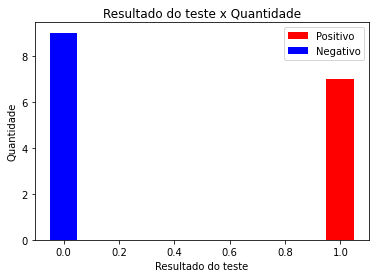

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.bar(1, len(dados.corona_test.values[dados.corona_test.values == 1]), color='red', width=0.1, label='Positivo')
plt.bar(0, len(dados.corona_test.values[dados.corona_test.values == 0]), color='blue', width=0.1, label='Negativo')
plt.xlabel('Resultado do teste')
plt.ylabel('Quantidade')
plt.title('Resultado do teste x Quantidade')
plt.legend()
plt.savefig('TesteXQuantidade.png')

Também analisamos a quantidade de indivíduos de cada gênero.

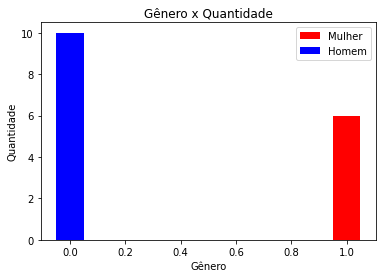

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(1, len(dados.gender.values[dados.gender.values == 1]), color='red', width=0.1, label='Mulher')
plt.bar(0, len(dados.gender.values[dados.gender.values == 0]), color='blue', width=0.1, label='Homem')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Gênero x Quantidade')
plt.legend()
plt.savefig('GeneroXQuantidade.png')

Também é possível verificar por gênero a quantidade de testes positivos e negativos. O próximo gráfico apresenta essa análise para o gênero masculino.

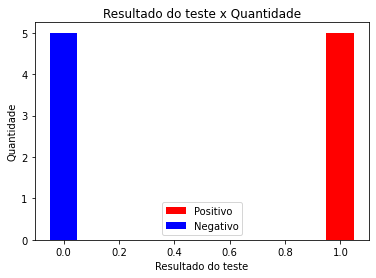

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

masculino = dados[dados.gender == 0]

plt.bar(1, len(masculino.corona_test.values[masculino.corona_test.values == 1]), color='red', width=0.1, label='Positivo')
plt.bar(0, len(masculino.corona_test.values[masculino.corona_test.values == 0]), color='blue', width=0.1, label='Negativo')
plt.xlabel('Resultado do teste')
plt.ylabel('Quantidade')
plt.title('Resultado do teste x Quantidade')
plt.legend()
plt.savefig('TesteXQuantidade-Masculino.png')

O mesmo é feito para o gênero feminino.

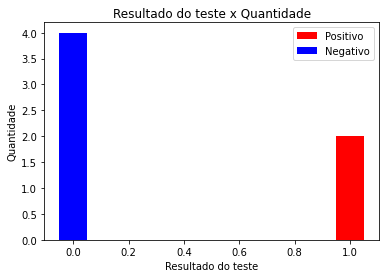

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

feminino = dados[dados.gender == 1]

plt.bar(1, len(feminino.corona_test.values[feminino.corona_test.values == 1]), color='red', width=0.1, label='Positivo')
plt.bar(0, len(feminino.corona_test.values[feminino.corona_test.values == 0]), color='blue', width=0.1, label='Negativo')
plt.xlabel('Resultado do teste')
plt.ylabel('Quantidade')
plt.title('Resultado do teste x Quantidade')
plt.legend()
plt.savefig('TesteXQuantidade-Feminino.png')

In [22]:
import imgkit

corr = dados.corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)

,corona_test,age,gender,smoker,Congestive heart failure,Asthma or chronic lung disease,Diabetes with complications,Shortness of breath,Sore throat,New or worsening cough,Loss of taste,Loss of smell,Body aches,"Fever, chills, or sweating"
corona_test,1.00,0.16,-0.16,-0.33,0.29,0.29,0.05,0.49,0.22,0.36,0.43,0.43,-0.23,0.43
age,0.16,1.00,-0.54,0.28,0.14,0.40,0.42,0.05,-0.06,0.16,0.11,0.11,-0.44,0.25
gender,-0.16,-0.54,1.00,-0.29,-0.20,-0.20,0.10,-0.24,0.03,-0.33,0.10,0.10,0.33,-0.29
smoker,-0.33,0.28,-0.29,1.00,-0.10,-0.10,-0.14,-0.25,-0.25,-0.29,-0.14,-0.14,-0.10,-0.14
Congestive heart failure,0.29,0.14,-0.20,-0.10,1.00,-0.07,-0.10,0.38,-0.17,-0.20,-0.10,-0.10,-0.07,-0.10
Asthma or chronic lung disease,0.29,0.40,-0.20,-0.10,-0.07,1.00,-0.10,0.38,-0.17,0.33,-0.10,-0.10,-0.07,-0.10
Diabetes with complications,0.05,0.42,0.10,-0.14,-0.10,-0.10,1.00,-0.25,0.15,0.10,-0.14,-0.14,-0.10,0.43
Shortness of breath,0.49,0.05,-0.24,-0.25,0.38,0.38,-0.25,1.00,0.13,0.31,0.15,0.15,0.38,0.15
Sore throat,0.22,-0.06,0.03,-0.25,-0.17,-0.17,0.15,0.13,1.00,0.03,0.56,0.56,0.38,0.56
New or worsening cough,0.36,0.16,-0.33,-0.29,-0.20,0.33,0.10,0.31,0.03,1.00,0.10,0.10,-0.20,0.49
